# Homework #2 (option #2) - Image 1

## Haesook Ma

**Homework2: Pick 3 of your own images and create a visualization that shows how *similar/different* these images are using these histogramming methods presented in class.**

I would like to analyze the the following image, Kakao Ryan, which is a famous character in Korea. I chose this image because it seems to have a similar set of color to the Stitch image:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

In [2]:
im1 = Image.open("Ryan.png") # saved the image in the local 

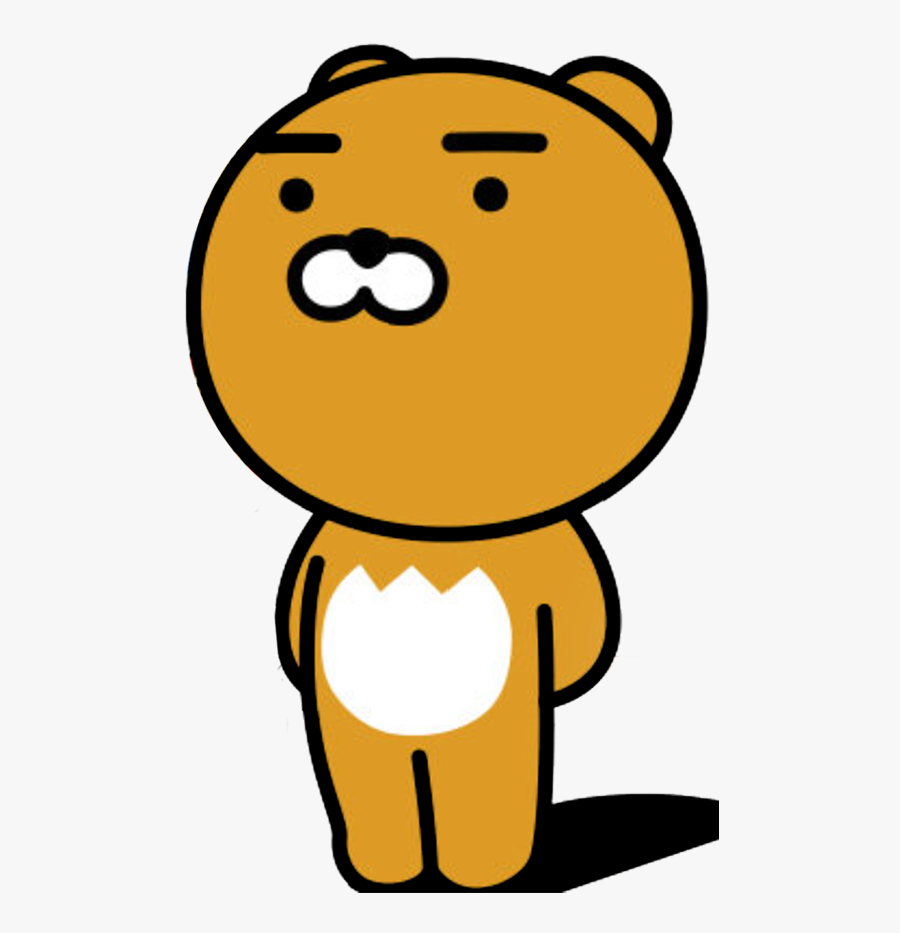

In [3]:
im1

In [4]:
im1_data = np.array(im1)

In [5]:
im1_data

array([[[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       ...,

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247

In [6]:
im1_data.shape

(933, 900, 4)

In [7]:
im1_data.shape[2]

4

In [8]:
np.unique(im1_data)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## After checking the number of colors in the image

I discovered there are many colors in the image. Thus, I decided to use the following code to covert the image with *3 colors:*

In [9]:
import scipy
import scipy.misc
import scipy.cluster

# NOTE: I copied the following code from the professor's notebook.
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In [10]:
path_to_image = 'Ryan.png'

In [11]:
im = Image.open(path_to_image)

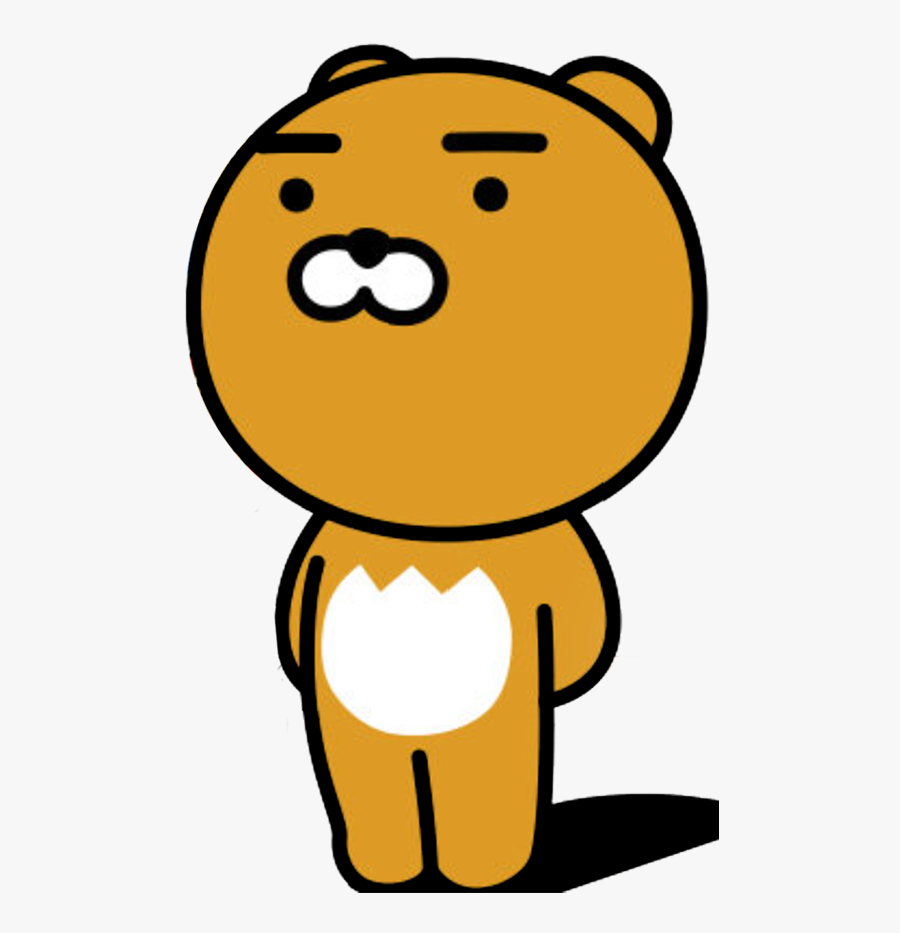

In [12]:
im

In [13]:
new_im, new_rgbs = convert_image(im, ncolors = 3)

finding 3 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[247.20956055 247.17567083 247.08407019]
 [218.53029447 153.003323    37.79343605]
 [  7.15570571   5.4683902    2.96246555]]


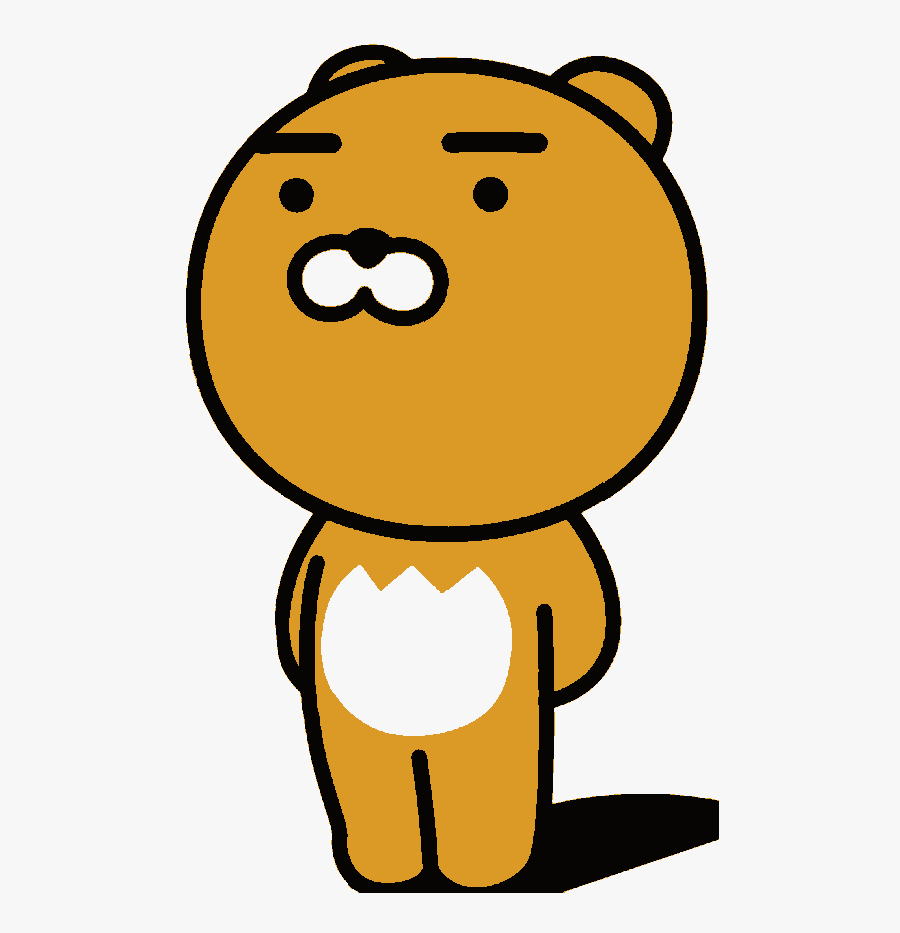

In [14]:
new_im

In [15]:
new_im_data = np.array(new_im)

In [16]:
new_im_data

array([[[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [247, 247, 247],
        [247, 247, 247],
        [247, 247, 247]]

In [17]:
new_im_data.shape

(933, 900, 3)

In [18]:
np.unique(new_im_data)

array([  3,   5,   7,  38, 153, 219, 247], dtype=uint8)

In [19]:
channel_labels = ['R', 'G', 'B', 'A']
for i in range(new_im_data.shape[2]) :
    print('channel = ', channel_labels[i], ', unique values = ', np.unique(new_im_data[:,:,i]))

channel =  R , unique values =  [  7 219 247]
channel =  G , unique values =  [  5 153 247]
channel =  B , unique values =  [  3  38 247]


In [20]:
new_im_data.reshape(-1, new_im_data.shape[2])

array([[247, 247, 247],
       [247, 247, 247],
       [247, 247, 247],
       ...,
       [247, 247, 247],
       [247, 247, 247],
       [247, 247, 247]], dtype=uint8)

In [21]:
new_im_data.reshape(-1, new_im_data.shape[2]).shape

(839700, 3)

In [22]:
np.unique(new_im_data.reshape(-1, new_im_data.shape[2]), axis = 0)

array([[  7,   5,   3],
       [219, 153,  38],
       [247, 247, 247]], dtype=uint8)

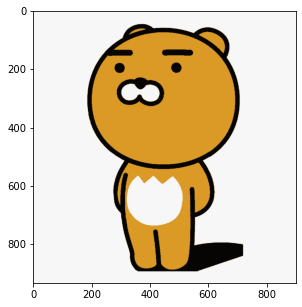

In [23]:
fig, ax = plt.subplots(figsize=(5,5)) # generating figure & axis objects

ax.imshow(new_im_data) # using the matplotlib imshow function to plot image data

plt.show() # showing the image

In [24]:
# [ 7,   5,   3]
pixel_black = (new_im_data[:,:,0] == 7) & (new_im_data[:,:,1] == 5) & (new_im_data[:,:, 2] == 3) 

# [219, 153,  38]
pixel_yellow = (new_im_data[:,:,0] == 219) & (new_im_data[:,:,1] == 153) & (new_im_data[:,:, 2] == 38) 

# [247, 247, 247]
pixel_white = (new_im_data[:,:,0] == 247) & (new_im_data[:,:,1] == 247) & (new_im_data[:,:, 2] == 247) 

In [25]:
ryan_black = len(new_im_data[pixel_black])
ryan_yellow = len(new_im_data[pixel_yellow])
ryan_white = len(new_im_data[pixel_white])

In [26]:
ryan_black, ryan_yellow, ryan_white

(72174, 218405, 549121)

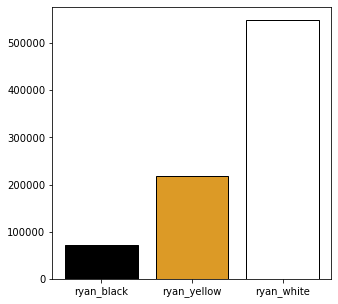

In [27]:
fig, ax = plt.subplots(figsize=(5,5))

labels = np.array(['ryan_black', 'ryan_yellow', 'ryan_white']) # labels for our x-axis
values = np.array([ryan_black, ryan_yellow, ryan_white]) # heights for our y-axis

colors = np.array(['black', '#dc9a26', 'white'])

myBarChart = ax.bar(labels, values) # is another plotting routine in matplotlib (barchart)

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(colors[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')
    
plt.show()

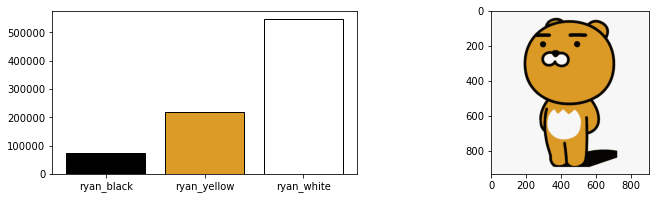

In [28]:
fig, ax = plt.subplots(1,2, figsize=(12,3))

labels = np.array(['ryan_black', 'ryan_yellow', 'ryan_white']) # labels for our x-axis
values = np.array([ryan_black, ryan_yellow, ryan_white]) # heights for our y-axis

colors = np.array(['black', '#dc9a26', 'white'])

myBarChart = ax[0].bar(labels, values) # is another plotting routine in matplotlib (barchart)

# loop through each bar and set it to a particular color
for i in range(len(myBarChart)): # through all bars
    myBarChart[i].set_color(colors[i]) # setting the color of the ith bar
    myBarChart[i].set_edgecolor('black')

#also plot image
ax[1].imshow(new_im_data)
    
plt.show()

## To Conclude

I chose this image because the set of color seems similar to the Stitch image. However, there were several differences comparing to the Stitch image. 

(1) After checking the color set of the Ryan image, there were more colors than I expected. So, I used the provided code to convert the image to 3 colors. 

(2) In this image, the background is not transparent but has a white color. That's why the highest bar in the barchart is ryan_white.

(3) When analyzing the Stitch image, there was a meaning for red and white color. However, in the Ryan image, there isn't any meaning for each color. 

Lastly, when I choose the color for the ryan_yellow, I googled the color number and added in the code. It would be good to learn how to find the right color using a code instead of goolging the color code number. 